# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [2]:
import numpy as np

def population_risk(a, sigma_eps):
    return np.square(a - 1) + np.square(sigma_eps)

### b)

In [3]:
# sampling
n = 50
sigma = 1

X = np.random.normal(loc=0, scale=1, size=n)
y = X + np.random.normal(loc=0, scale=sigma, size=n)

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [4]:
def empirical_risk(a, x, y):
    return np.mean(np.square(a * x - y))

### c)

In [9]:
# code, plot
from sklearn.linear_model import LinearRegression

mod = LinearRegression(fit_intercept=False)
mod.fit(X.reshape(-1, 1), y)

mod.coef_

array([0.96097847])

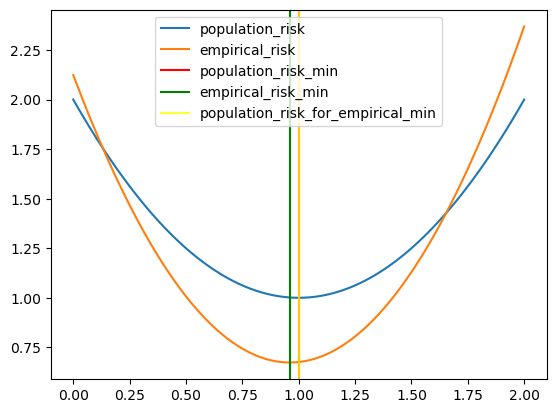

In [26]:
import matplotlib.pyplot as plt

a = np.linspace(0, 2, 100)

plt.plot(a, population_risk(a, sigma), label="population_risk")

empirical_risks = []
for a_ in a:
    empirical_risks.append(empirical_risk(a_, X, y))

plt.plot(a, empirical_risks, label="empirical_risk")

plt.axvline(1, c="r", label="population_risk_min")
plt.axvline(mod.coef_, c="g", label="empirical_risk_min")
plt.axvline(population_risk(mod.coef_, sigma), c="yellow", label="population_risk_for_empirical_min", alpha=0.8)
plt.legend()
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [27]:
# excess risk
def excess_risk(a_hat, sigma_eps):
    return population_risk(a_hat, sigma_eps) - np.square(sigma)

In [28]:
# simulations with fixed sample size
L = 200
n = 50
sigma = 1

excess_risks = []

for i in range(L):
    X = np.random.normal(loc=0, scale=1, size=n)
    y = X + np.random.normal(loc=0, scale=sigma, size=n)

    mod = LinearRegression(fit_intercept=False)
    mod.fit(X.reshape(-1, 1), y)

    excess_risks.append(excess_risk(mod.coef_, sigma))

Average Excess Risk

In [29]:
np.mean(excess_risks)

0.02101867199350005

In [39]:
# simulations for various sample sizes

L = 200
n = [20, 50, 100, 200, 500]
sigma = 1

results = []

for i in range(L):
    for n_ in n:
        X = np.random.normal(loc=0, scale=1, size=n_)
        y = X + np.random.normal(loc=0, scale=sigma, size=n_)

        mod = LinearRegression(fit_intercept=False)
        mod.fit(X.reshape(-1, 1), y)

        results.append({"n": n_, "excess_risk": excess_risk(mod.coef_, sigma).item()})

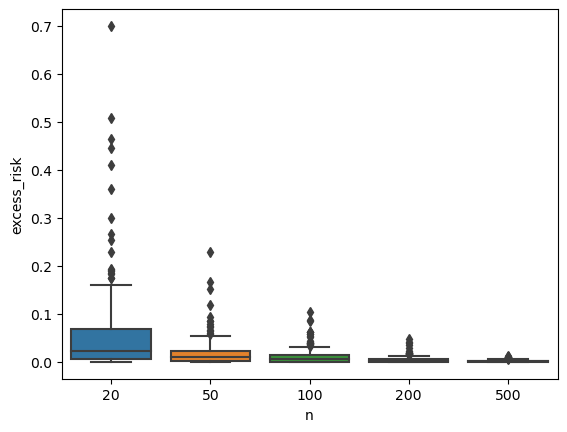

In [42]:
import pandas as pd
import seaborn as sns

results_df = pd.DataFrame.from_records(results)

sns.boxplot(data=results_df, x="n", y="excess_risk")
plt.show()

In [43]:
results_df.groupby("n")["excess_risk"].mean()

n
20     0.058611
50     0.019172
100    0.011083
200    0.004771
500    0.002007
Name: excess_risk, dtype: float64

As the sample size grows, the excess risk gets lower